## Added required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Reading data from csv file

In [7]:
data = pd.read_csv('./Heart _Diseases/heart.csv')

## Displaying first five rows 

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Displaying last five rows

In [8]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Displaying the info of the file

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Counting data

In [10]:
age_counts = data.groupby('age').size()
ages = age_counts.index
people = age_counts.values

bp_counts = data.groupby('trestbps').size()
bps = bp_counts.index
bp_people = bp_counts.values

## Plotting age vs people

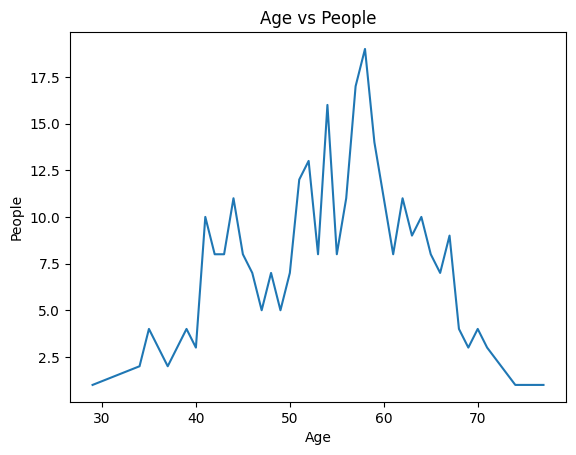

In [11]:
plt.plot(ages, people)
plt.xlabel('Age')
plt.ylabel('People')
plt.title('Age vs People')
plt.show()

## Plotting Blood Pressure vs Age

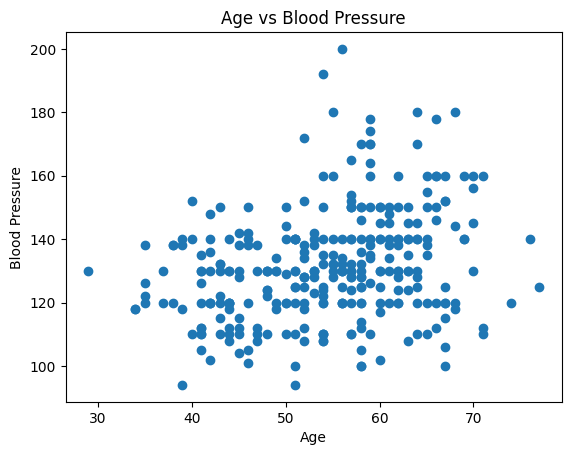

In [12]:
plt.scatter(data['age'], data['trestbps'])
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs Blood Pressure')
plt.show()

## Plotting sex vs people

Text(0.5, 1.0, 'sex vs people')

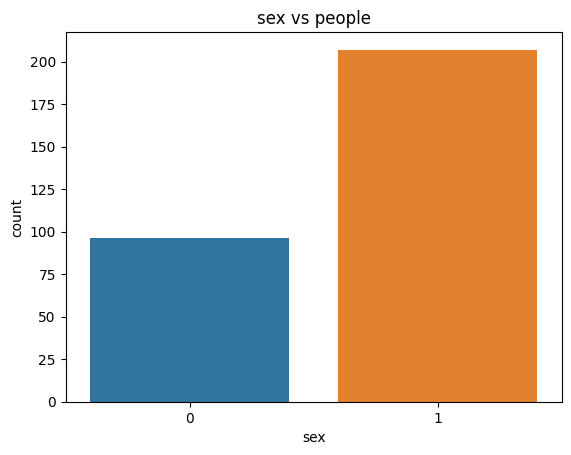

In [13]:
sns.countplot(x='sex', data=data)
xlabel='sex'
plt.title('sex vs people')

## Plotting cp vs people

Text(0.5, 1.0, 'cp vs people')

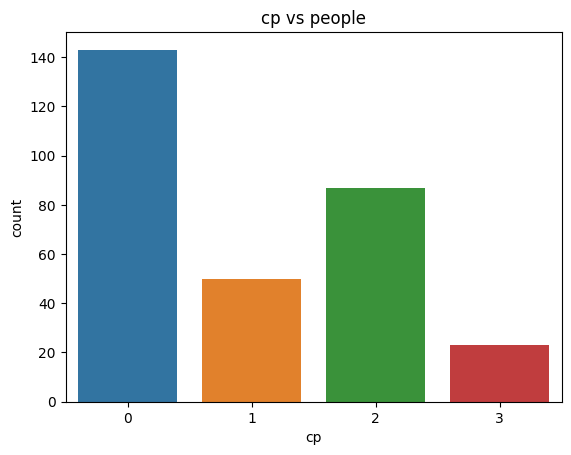

In [14]:
sns.countplot(x='cp', data=data)
xlabel='cp'
plt.title('cp vs people')


## Plotting in pair Blood Pressure vs Cholesterol vs Blood Sugar vs Maximum Heart Rate, Exercise Angina

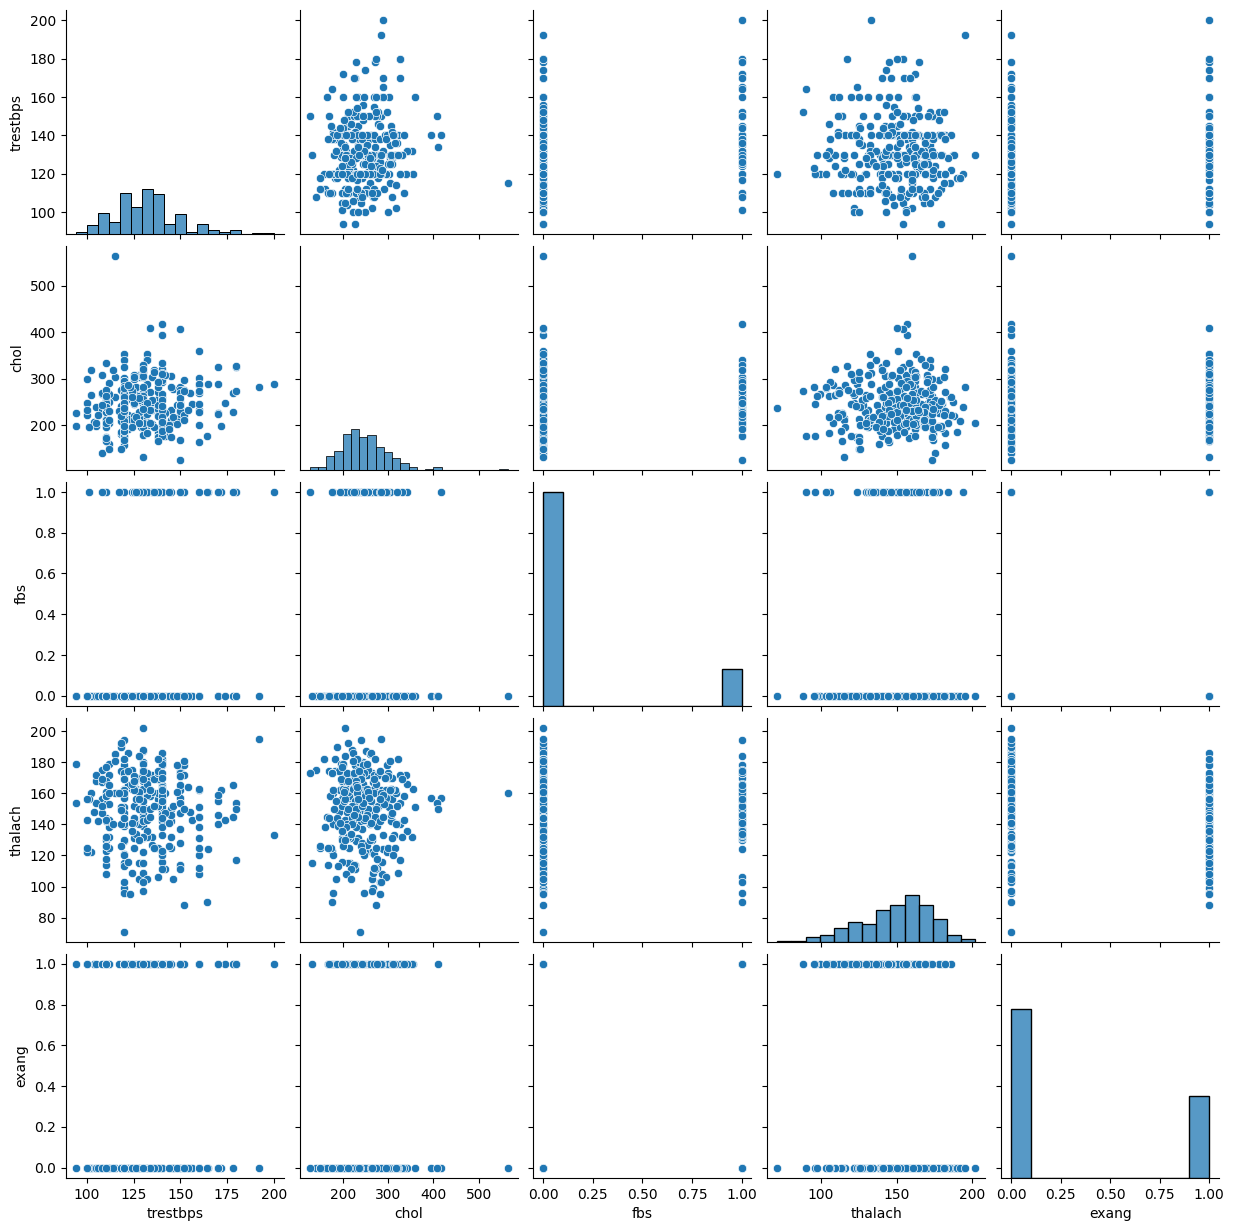

In [15]:
sns.pairplot(data, vars=['trestbps', 'chol', 'fbs', 'thalach', 'exang'])

## Adding Test Split for training and testing

In [16]:
predictors = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca' ]]
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


## Logistic Regression Method of Machine Learning

In [17]:
lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.33 %


C:\Users\Smaranika\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Confusion Matrix of Logistic Regression Method

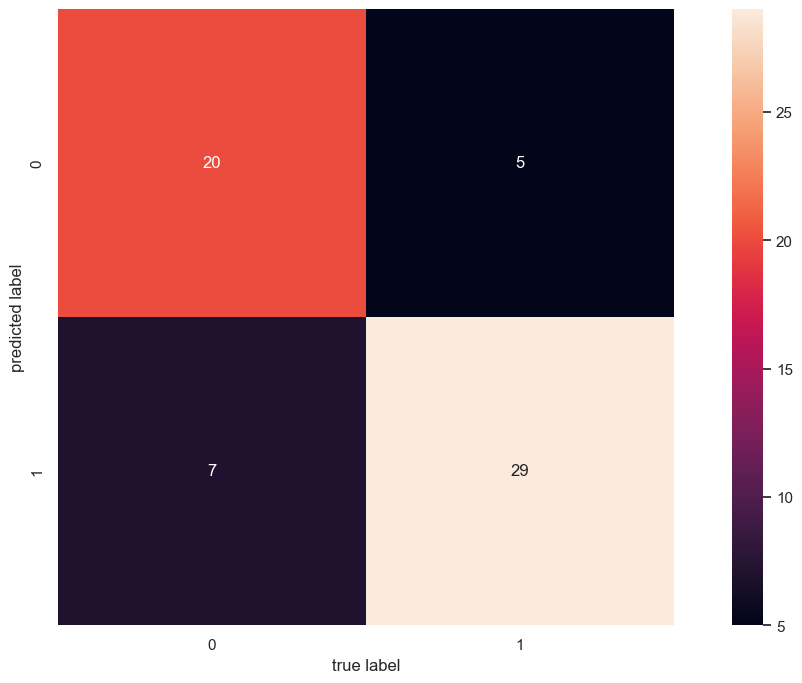

In [26]:
mat1 = confusion_matrix(Y_test, Y_pred_lr)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

## Gaussian Naive Bayes Method of Machine Learning

In [18]:
nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 81.97 %


## Confusion Matrix of Gaussian Naive Bayes Method

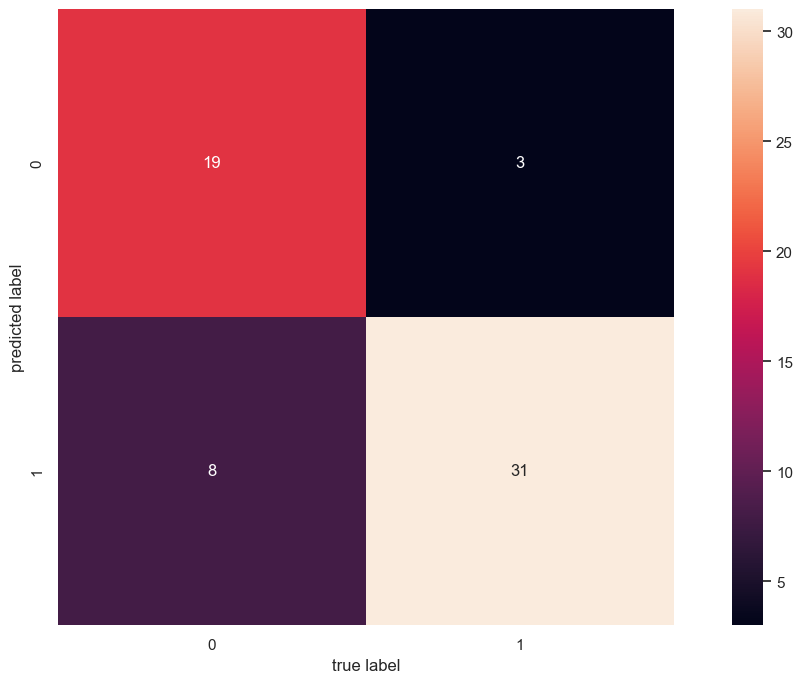

In [27]:
mat1 = confusion_matrix(Y_test, Y_pred_nb)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

## Support Vector Machine Method of Machine Learning

In [19]:
sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


## Confusion Matrix of Support Vector Machine Method

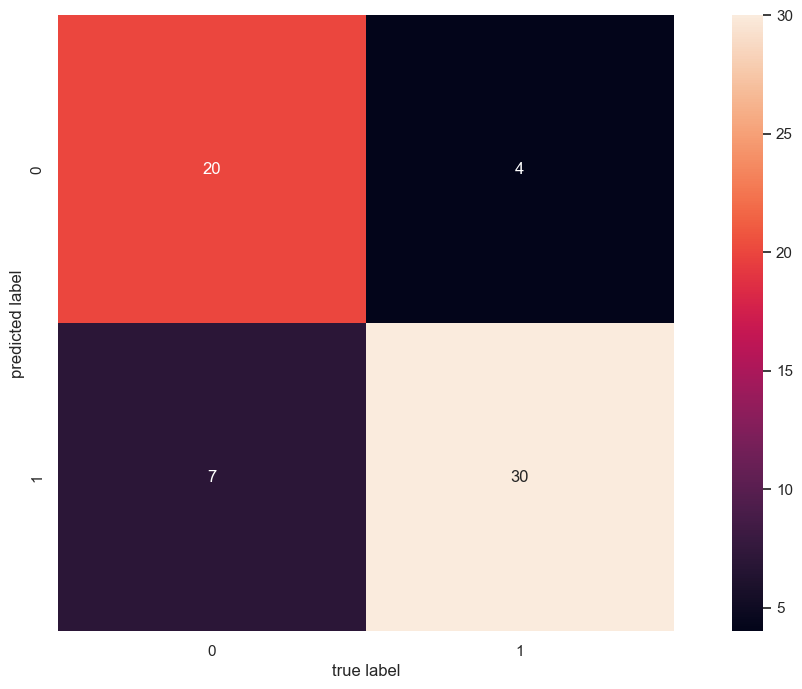

In [28]:
mat1 = confusion_matrix(Y_test, Y_pred_svm)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

## K Nearest Neighbors Method of Machine Learning

In [20]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


## Confusion Matrix of K Nearest Neighbours Method

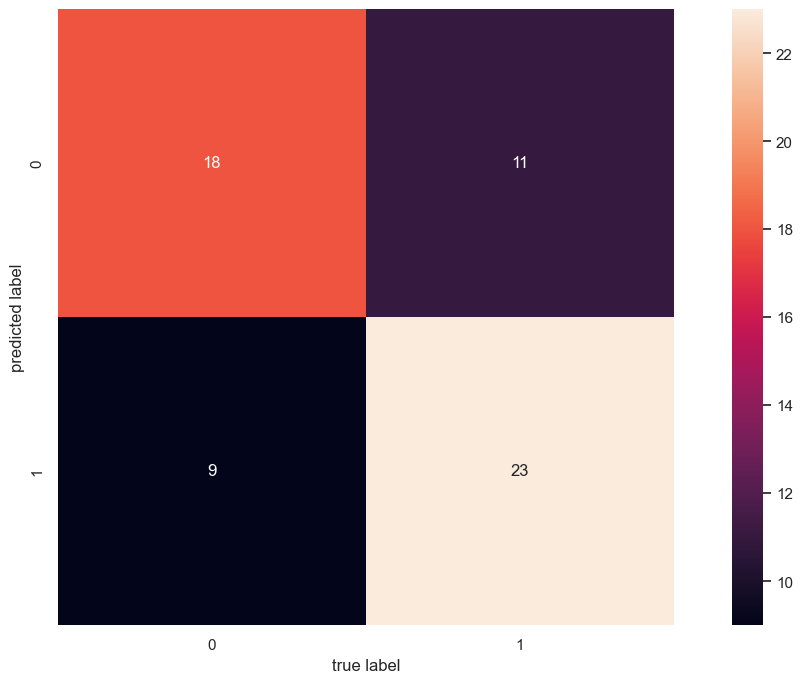

In [29]:
mat1 = confusion_matrix(Y_test, Y_pred_knn)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

## Decision Tree Method of Machine Learning

In [21]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.69 %


## Confusion Matrix of Decision Tree Method

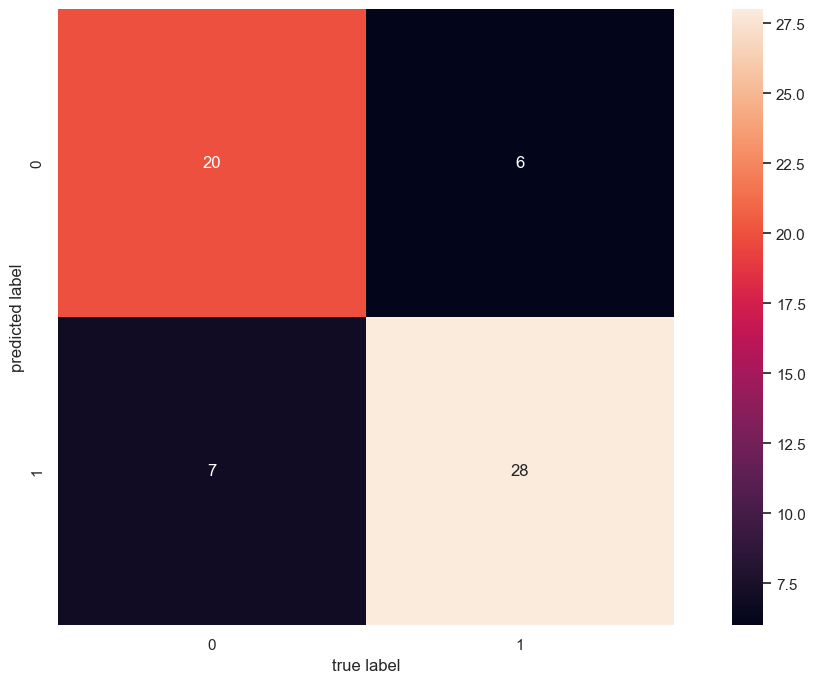

In [30]:
mat1 = confusion_matrix(Y_test, Y_pred_dt)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

## Random Forest Method of Machine Learning

In [23]:
max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 86.89 %


## Confusion Matrix of Random Forest Method

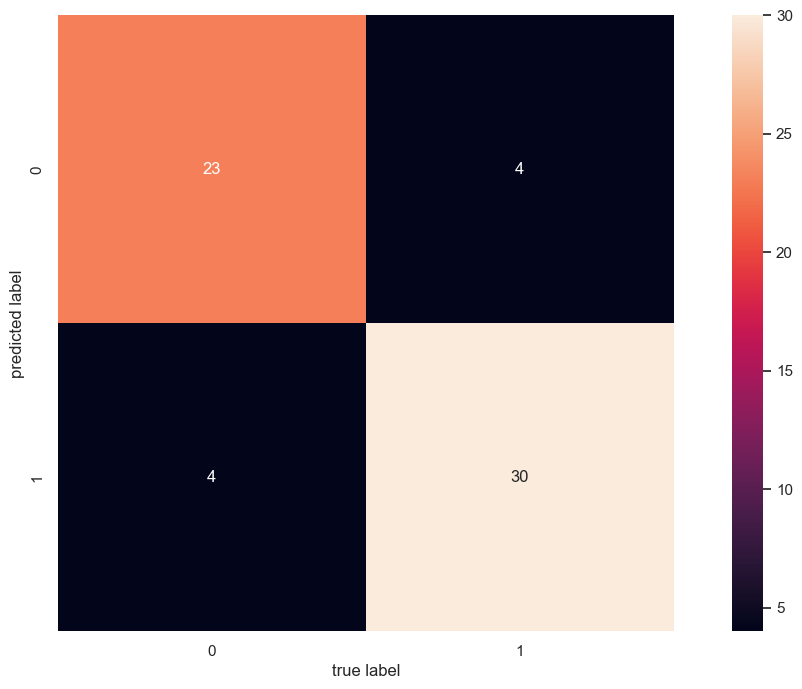

In [31]:
mat1 = confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

## Comparison plot of accuracy of all methods

<Axes: xlabel='algorithm', ylabel='accuracy'>

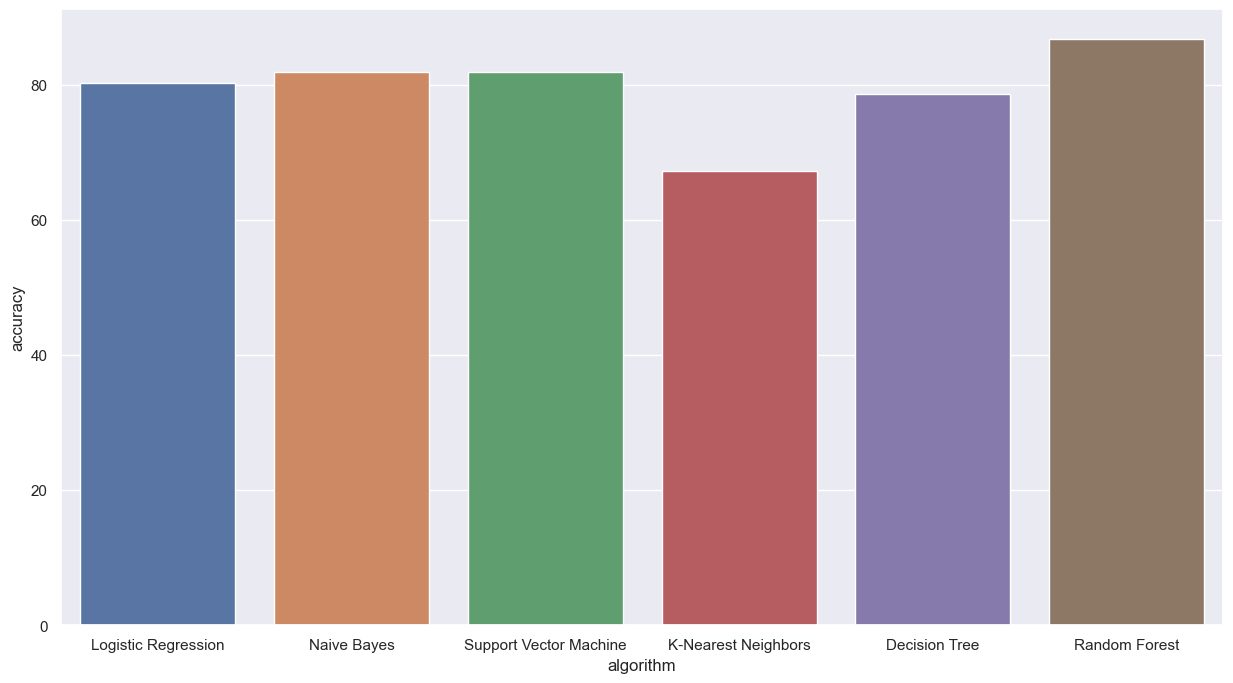

In [24]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"] 

algo_data = pd.DataFrame({'algorithm': algorithms, 'accuracy': scores})

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x='algorithm', y='accuracy', data=algo_data)

## Joint Plot between Age and Sex

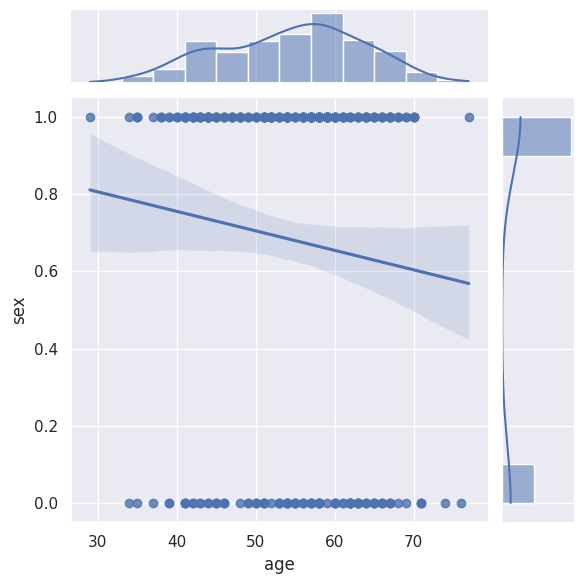

In [33]:
sns.jointplot(x='age', y='sex', data=data, kind='reg')

## Joint Plot between Age and Chest Pain

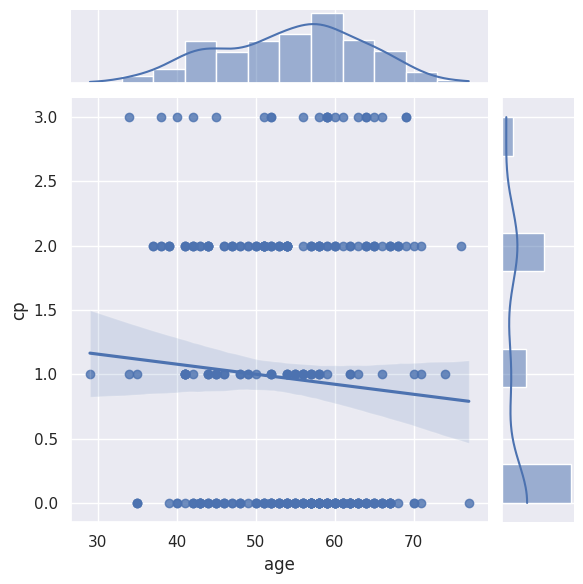

In [36]:
sns.jointplot(x='age', y='cp', data=data, kind='reg')

## Joint Plot between Age and Blood Pressure

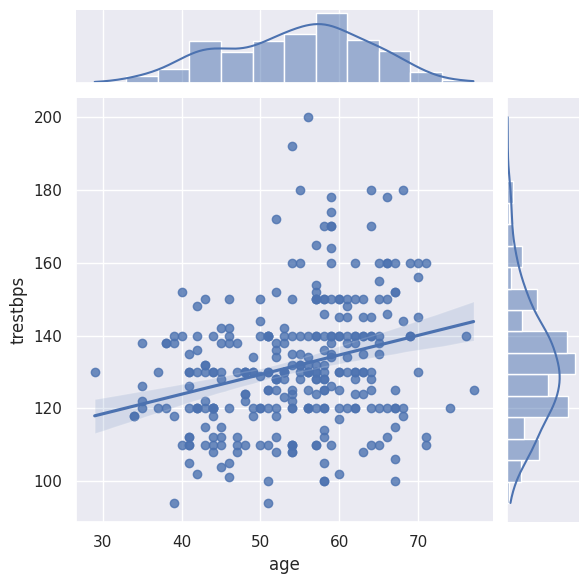

In [42]:
sns.jointplot(x='age', y='trestbps', data=data, kind='reg')

## Joint Plot between Age and Blood Sugar

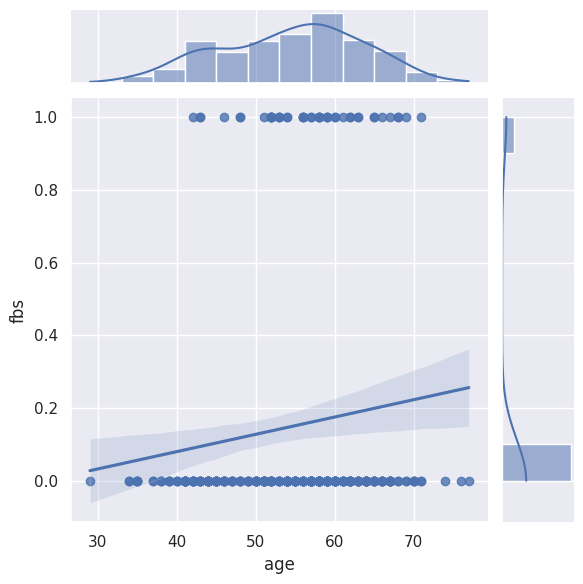

In [43]:
sns.jointplot(x='age', y='fbs', data=data, kind='reg')

## Joint Plot between Age and Cholesterol

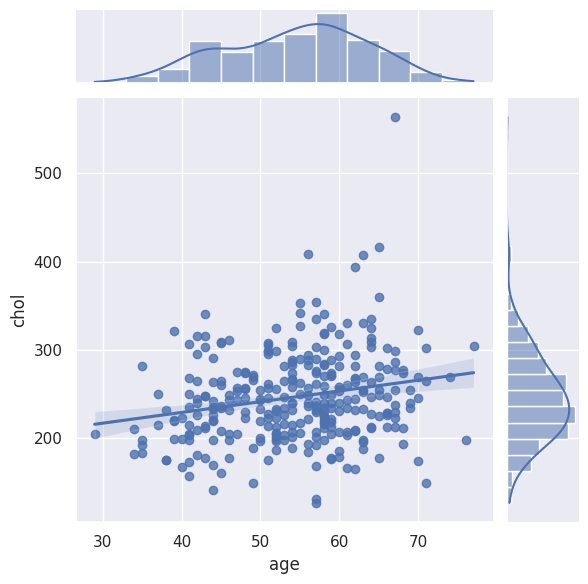

In [44]:
sns.jointplot(x='age', y='chol', data=data, kind='reg')